In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "../library"]).decode("utf8"))

Azure Notebooks - Welcome.ipynb
Canny_Image for Object boundaries-Copy1.ipynb
Canny_Image for Object boundaries.ipynb
Creation and Deployment of an Azure ML Web Service.ipynb
Cricket_Prediction.ipynb
Digit_Recognition.ipynb
Discover Sentiments in Tweets.ipynb
Environment.png
FSharp for Azure Notebooks.ipynb
Getting to your Data in Azure Notebooks.ipynb
Img_input2.jpg
Introduction to Python.ipynb
Introduction to R.ipynb
Introduction1.ipynb
Kmean-Demo.ipynb
NeuralNetwork.ipynb
Orig1.png
README.html
Street.jpg
Untitled.ipynb
challenge.mp4
img_input.jpg
kMeans.jpg
matches.csv
oil_price.csv
shell.log
solidWhiteCurve.jpg
solidWhiteRight.jpg
solidWhiteRight.mp4
solidYellowCurve.jpg
solidYellowCurve2.jpg
solidYellowLeft.jpg
solidYellowLeft.mp4
test.jfif
whiteCarLaneSwitch.jpg



In [3]:
import numpy as np
from PIL import Image
# get and read photo

img = Image.open("../library/kMeans.jpg")

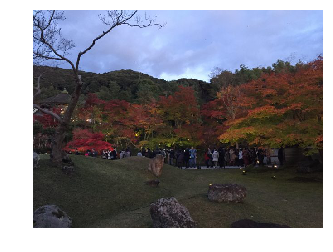

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
#input the value of k
n_colors = 8

#convert to float by dividing by 255 so that float data can be shown using imshow()
img = np.array(img, dtype=np.float64) / 255
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
im_ar = np.reshape(img, (w * h, d))

In [6]:
print("Model fitting")
im_ar_sample = shuffle(im_ar, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(im_ar_sample)

#Get labels(color indices) for all data points in image
print("Predicting")
labels = kmeans.predict(im_ar)

Model fitting
Predicting


In [7]:
def Revert_to_pic(cb, lb, w, h):
    d = cb.shape[1]
    im = np.zeros((w, h, d))
    lb_idx = 0
    for i in range(w):
        for j in range(h):
            im[i][j] = cb[lb[lb_idx]]
            lb_idx += 1            
    return im

k-8 means
Dimension of image matrix
3


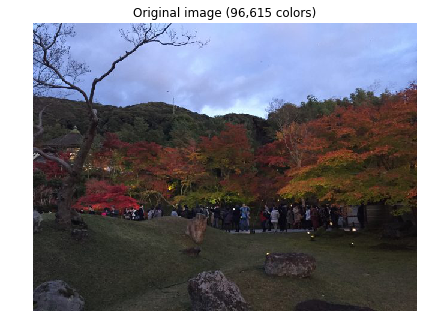

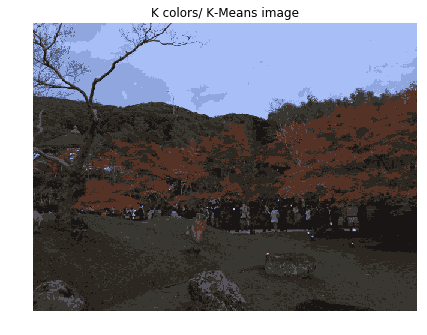

In [8]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(img)

print('k-%d means'% (n_colors))
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('K colors/ K-Means image')
im_val = Revert_to_pic(kmeans.cluster_centers_, labels, w, h)
print('Dimension of image matrix')
print(im_val.ndim)
plt.imshow(im_val)
plt.show()

In [9]:
print
w,h

(480, 640)

In [10]:
labels

array([6, 6, 1, ..., 4, 4, 4], dtype=int32)

In [11]:
labels.ndim

1

In [12]:
minval = labels[0]
maxval = labels[0]
for i in labels:
    if i < minval:
       minval = i
    if i > maxval:
       maxval = i

In [13]:
print('k=8 has color indexing done for 0-7 values')    
print(minval,maxval)

k=8 has color indexing done for 0-7 values
0 7


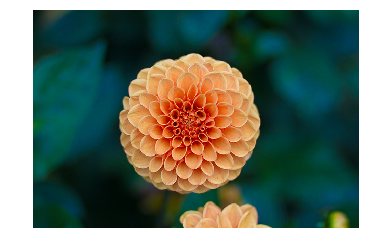

In [14]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()     
plt.imshow(dataset.images[1] )
plt.axis('off')
plt.show()
img = dataset.images[1]

In [17]:
print('Image Matrix for k-means input')
im_ar


Matrix for k-means input


array([[ 0.50980392,  0.60784314,  0.83137255],
       [ 0.49803922,  0.6       ,  0.82352941],
       [ 0.60784314,  0.72156863,  0.94901961],
       ..., 
       [ 0.24313725,  0.21568627,  0.18431373],
       [ 0.2627451 ,  0.23529412,  0.20392157],
       [ 0.29019608,  0.2627451 ,  0.23137255]])

In [18]:
print('Image Matrix after k-means applied')
im_val

Matrix returned by the k-means prediction


array([[[ 0.56605593,  0.65104468,  0.8772099 ],
        [ 0.56605593,  0.65104468,  0.8772099 ],
        [ 0.65858586,  0.74808873,  0.96559715],
        ..., 
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715]],

       [[ 0.65858586,  0.74808873,  0.96559715],
        [ 0.56605593,  0.65104468,  0.8772099 ],
        [ 0.56605593,  0.65104468,  0.8772099 ],
        ..., 
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715]],

       [[ 0.56605593,  0.65104468,  0.8772099 ],
        [ 0.56605593,  0.65104468,  0.8772099 ],
        [ 0.38823529,  0.45761689,  0.64434389],
        ..., 
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715],
        [ 0.65858586,  0.74808873,  0.96559715]],

       ..., 
       [[ 0.22523444,  0.21731553,  0.19712039],
        